<font size= "5">Importing Libs</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

<font size= "5">Importing Data</font>

In [3]:
df = pd.read_csv('train.csv')

In [4]:
dt = pd.read_csv('test.csv')

<font size= "5">Analyzing Data</font>

In [5]:
df.head()

,Price,Carat,Color,Clarity,Cut
0,6877,1.40,H,SI2,Very Good
1,4416,1.01,J,VS1,Very Good
2,4866,0.80,F,VVS1,Ideal
3,3522,0.92,E,SI1,Very Good
4,1102,0.40,E,VS1,Excellent


In [6]:
dt.head()

,Carat,Color,Clarity,Cut
0,1.26,G,SI2,Good
1,1.02,F,VVS2,Very Good
2,1.00,H,SI1,Very Good
3,0.96,H,VS2,Very Good
4,0.72,F,SI1,Good


In [7]:
from sklearn.preprocessing import LabelEncoder

<font size = "5">Handling with cathegorical data from train data set</font>

In [8]:
df = pd.concat([df, pd.get_dummies(df['Color'], prefix='Color')], axis=1)

In [9]:
df = pd.concat([df, pd.get_dummies(df['Clarity'], prefix='Clar')], axis=1)

In [10]:
df['Cut_encoded'] = df['Cut'].map( {'Good':0, 'Very Good':1, 'Excellent':2,'Ideal':3})

In [11]:
#df = pd.concat([df, pd.get_dummies(df['Cut'], prefix='Cut')], axis=1)

<font size = "5">Handling with cathegorical data from TEST data set</font>

In [12]:
dt = pd.concat([dt, pd.get_dummies(dt['Color'], prefix='Color')], axis=1)

In [13]:
dt = pd.concat([dt, pd.get_dummies(dt['Clarity'], prefix='Clar')], axis=1)

In [14]:
dt['Cut_encoded'] = dt['Cut'].map( {'Good':0, 'Very Good':1, 'Excellent':2,'Ideal':3})

In [15]:
#dt = pd.concat([dt, pd.get_dummies(dt['Cut'], prefix='Cut')], axis=1)

<font size = "5">Veryfing cathegorical data handled</font>

In [16]:
df.head()

,Price,Carat,Color,Clarity,Cut,Color_D,Color_E,Color_F,Color_G,Color_H,...,Color_J,Color_K,Clar_IF,Clar_SI1,Clar_SI2,Clar_VS1,Clar_VS2,Clar_VVS1,Clar_VVS2,Cut_encoded
0,6877,1.40,H,SI2,Very Good,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,4416,1.01,J,VS1,Very Good,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,4866,0.80,F,VVS1,Ideal,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
3,3522,0.92,E,SI1,Very Good,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1102,0.40,E,VS1,Excellent,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2


In [17]:
dt.head()

,Carat,Color,Clarity,Cut,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J,Color_K,Clar_IF,Clar_SI1,Clar_SI2,Clar_VS1,Clar_VS2,Clar_VVS1,Clar_VVS2,Cut_encoded
0,1.26,G,SI2,Good,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1.02,F,VVS2,Very Good,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1.00,H,SI1,Very Good,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0.96,H,VS2,Very Good,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0.72,F,SI1,Good,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


<font size = "5">Some graphs insights </font>

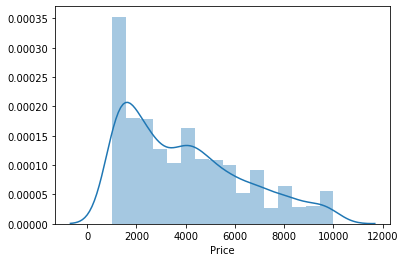

In [18]:
sns.distplot(df['Price'])

In [19]:
#sns.heatmap(df.corr(),annot=True)

<font size = "5"> Let's create our model train and test </font>

In [20]:
df.columns

Index(['Price', 'Carat', 'Color', 'Clarity', 'Cut', 'Color_D', 'Color_E',
       'Color_F', 'Color_G', 'Color_H', 'Color_I', 'Color_J', 'Color_K',
       'Clar_IF', 'Clar_SI1', 'Clar_SI2', 'Clar_VS1', 'Clar_VS2', 'Clar_VVS1',
       'Clar_VVS2', 'Cut_encoded'],
      dtype='object')

In [21]:
#X = df[['Carat','Color_D', 'Color_E','Color_F', 'Color_G', 'Color_H', 'Color_I', 'Color_J', 'Color_K','Clar_IF', 'Clar_SI1', 'Clar_SI2', 'Clar_VS1', 'Clar_VS2', 'Clar_VVS1','Clar_VVS2', 'Clar_VVS2', 'Cut_Excellent', 'Cut_Good', 'Cut_Ideal', 'Cut_Very Good']]

In [22]:
X = df[['Carat','Color_D', 'Color_E','Color_F', 'Color_G', 'Color_H', 'Color_I', 'Color_J', 'Color_K','Clar_IF', 'Clar_SI1', 'Clar_SI2', 'Clar_VS1', 'Clar_VS2', 'Clar_VVS1','Clar_VVS2', 'Clar_VVS2', 'Cut_encoded']]

In [23]:
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # I've changed a lot this fucking parameters

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lm.intercept_)

-4049.802859056316


In [30]:
lm.coef_

array([ 8864.13123798,  1194.85267828,   996.92458069,   771.30513875,
         687.79091328,   147.39626551,  -445.51620435, -1132.03616889,
       -2220.71720327,   979.9315332 ,  -761.19798745, -1451.94403614,
         405.08138499,   -84.38754813,   654.16527181,   258.35138173,
         258.35138173,   162.77166329])

In [31]:
X_train.columns

Index(['Carat', 'Color_D', 'Color_E', 'Color_F', 'Color_G', 'Color_H',
       'Color_I', 'Color_J', 'Color_K', 'Clar_IF', 'Clar_SI1', 'Clar_SI2',
       'Clar_VS1', 'Clar_VS2', 'Clar_VVS1', 'Clar_VVS2', 'Clar_VVS2',
       'Cut_encoded'],
      dtype='object')

<font size = "5">Trying to understand the relation between each vector component with price or something like that</font>

In [32]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [33]:
cdf

,Coeff
Carat,8864.131238
Color_D,1194.852678
Color_E,996.924581
Color_F,771.305139
Color_G,687.790913
Color_H,147.396266
Color_I,-445.516204
Color_J,-1132.036169
Color_K,-2220.717203
Clar_IF,979.931533


<font size = "5">Time to make predictons on **TEST** data set </font>

In [34]:
#X_dt = dt[['Carat','Color_D', 'Color_E','Color_F', 'Color_G', 'Color_H', 'Color_I', 'Color_J', 'Color_K','Clar_IF','Clar_SI1', 'Clar_SI2', 'Clar_VS1', 'Clar_VS2', 'Clar_VVS1','Clar_VVS2', 'Clar_VVS2', 'Cut_Excellent', 'Cut_Good', 'Cut_Ideal', 'Cut_Very Good']]

In [35]:
X_dt = dt[['Carat','Color_D', 'Color_E','Color_F', 'Color_G', 'Color_H', 'Color_I', 'Color_J', 'Color_K','Clar_IF','Clar_SI1', 'Clar_SI2', 'Clar_VS1', 'Clar_VS2', 'Clar_VVS1','Clar_VVS2', 'Clar_VVS2', 'Cut_encoded']]

In [36]:
predictions = lm.predict(X_dt)

In [37]:
#plt.scatter(X_dt,predictions)

<font size = "5">Creating submission File</font>

In [38]:
submission = pd.DataFrame({'Id':np.arange(1, 691),'Price':predictions})

In [39]:
submission.head()

,Id,Price
0,1,6354.849378
1,2,6442.390569
2,3,4363.298320
3,4,4685.543510
4,5,2342.478784


In [40]:
filename = 'submissionONE.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: submissionONE.csv


## Ridge Regression 

In [41]:
from sklearn.linear_model import Ridge, SGDRegressor

In [42]:
ridge_reg = Ridge(alpha=0.5, solver="cholesky") # parameter of regularization ||x||^2

In [43]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [44]:
reg_predic = ridge_reg.predict(X_dt)

In [45]:
regsubmission = pd.DataFrame({'Id':np.arange(1, 691),'Price':reg_predic})

In [46]:
filename = 'submissionRIDGE.csv'

regsubmission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submissionRIDGE.csv


## Stochastic Gradient Descent

In [47]:
sgd_reg = SGDRegressor(penalty="l2") 


In [48]:
sgd_reg.fit(X_train, y_train.ravel())


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [49]:
sgd_pred = sgd_reg.predict(X_dt)

In [50]:
sgdsubmission = pd.DataFrame({'Id':np.arange(1, 691),'Price':sgd_pred})

In [51]:
filename = 'submissionSGD.csv'

sgdsubmission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submissionSGD.csv


Lasso Regression

In [52]:
from sklearn.linear_model import Lasso

In [53]:
lasso_reg = Lasso(alpha=0.5) # α ∑|x_i|

In [54]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
lasso_pred = sgd_reg.predict(X_dt)

In [56]:
lassosubmission = pd.DataFrame({'Id':np.arange(1, 691),'Price':lasso_pred})

In [57]:
filename = 'submissionLASSO.csv'

lassosubmission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submissionLASSO.csv
